<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Validation-Errors" data-toc-modified-id="Validation-Errors-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Validation Errors</a></span></li><li><span><a href="#Submit" data-toc-modified-id="Submit-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Submit</a></span></li></ul></div>

In [1]:
import os
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix

SEED = 42
tf.random.set_seed(SEED)

id2class = [
    "Palladian architecture",
    "Art Deco architecture",
    "American craftsman style",
    "International style",
    "Queen Anne architecture",
    "American Foursquare architecture",
    "Russian Revival architecture",
    "Colonial architecture",
    "Bauhaus architecture",
    "Postmodern architecture",
    "Tudor Revival architecture",
    "Achaemenid architecture",
    "Art Nouveau architecture",
    "Chicago school architecture",
    "Baroque architecture",
    "Georgian architecture",
    "Ancient Egyptian architecture",
    "Romanesque architecture",
    "Edwardian architecture",
    "Greek Revival architecture",
    "Byzantine architecture",
    "Gothic architecture",
    "Novelty architecture",
    "Beaux-Arts architecture"
]

class_names = [str(id) for id, _ in enumerate(id2class)]

In [2]:
image_size = (224, 224)
batch_size = 16

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory="train/train",
    labels="inferred",
    class_names=class_names,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=image_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory="train/train",
    labels="inferred",
    class_names=class_names,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=image_size,
    batch_size=batch_size
)

Found 3069 files belonging to 24 classes.
Using 2456 files for training.
Found 3069 files belonging to 24 classes.
Using 613 files for validation.


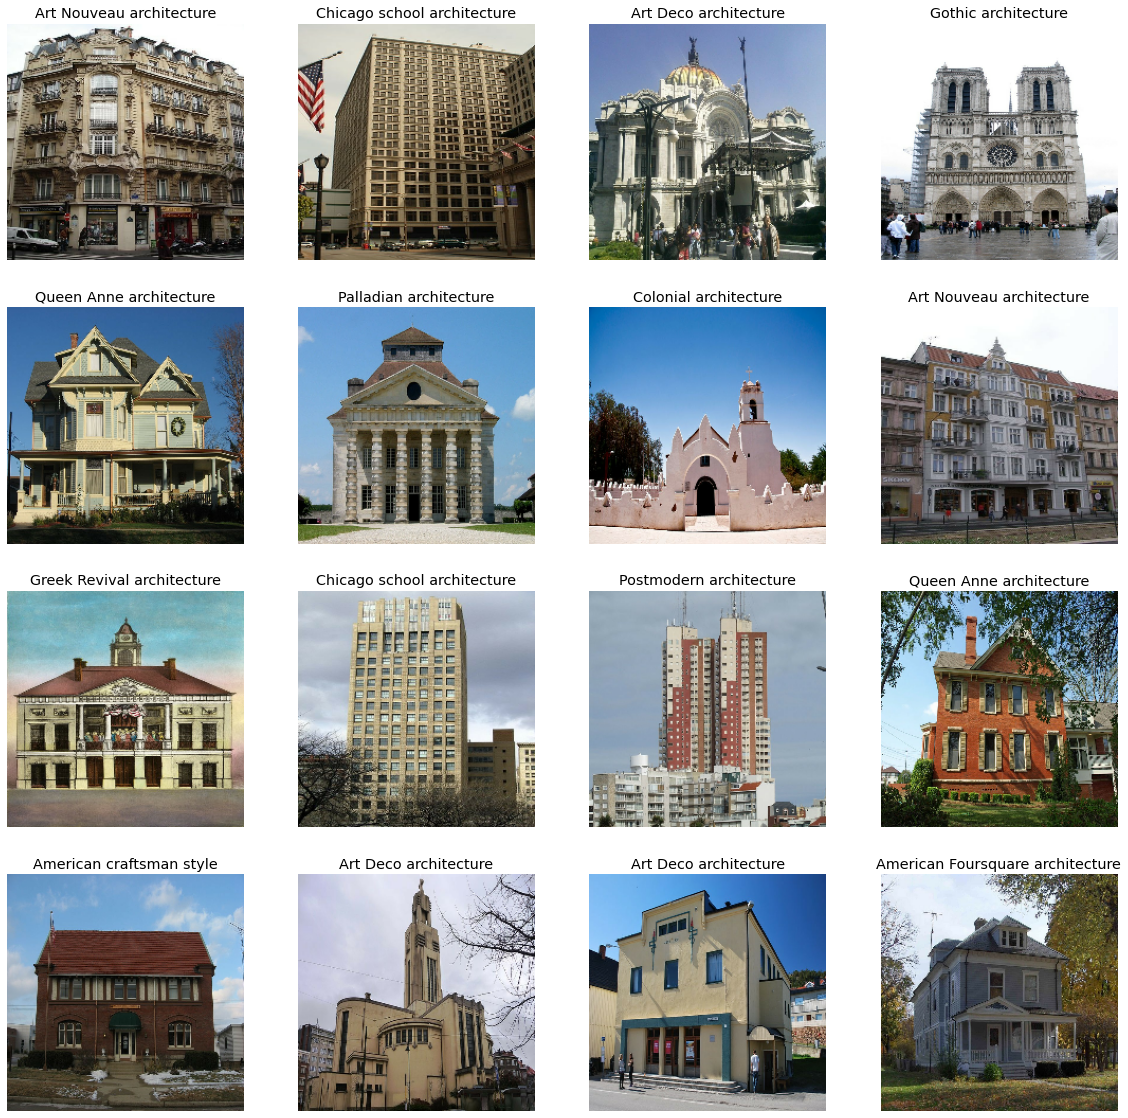

In [3]:
N_ROWS = 4
N_COLS = 4

fig, ax = plt.subplots(nrows=N_ROWS, ncols=N_COLS, figsize=(20, 20))

for images, targets in train_ds.take(1):
    images = images.numpy().astype("uint8")
    for i in range(N_ROWS):
        for j in range(N_COLS):
            ax[i, j].set_title(id2class[targets[i * N_COLS + j]])
            ax[i, j].imshow(images[i * N_COLS + j])
            ax[i, j].axis("off")
plt.show()

In [5]:
i = tf.keras.layers.Input([224, 224, 3], dtype=tf.float32)
x = tf.keras.applications.resnet50.preprocess_input(i)
backbone = tf.keras.applications.ResNet50(include_top=False, weights='imagenet')
backbone.trainable = False
x = backbone(x)
x = tf.keras.layers.Conv2D(filters=100, kernel_size=3, padding="same", activation="sigmoid")(x)
x = tf.keras.layers.MaxPool2D(pool_size=2)(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(units=len(id2class), activation="sigmoid")(x)
model = tf.keras.Model(inputs=[i], outputs=[x])

In [6]:
demo=tf.keras.applications.ResNet50(include_top=False, weights='imagenet')

In [7]:
demo.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=tf.keras.metrics.SparseCategoricalAccuracy()
)

In [9]:
history=model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
154/154 [==============================] - 243s 2s/step - loss: 2.8189 - sparse_categorical_accuracy: 0.1787 - val_loss: 2.3775 - val_sparse_categorical_accuracy: 0.3393
Epoch 2/10
154/154 [==============================] - 264s 2s/step - loss: 2.1025 - sparse_categorical_accuracy: 0.4015 - val_loss: 1.8107 - val_sparse_categorical_accuracy: 0.4666
Epoch 3/10
154/154 [==============================] - 253s 2s/step - loss: 1.6679 - sparse_categorical_accuracy: 0.5130 - val_loss: 1.5404 - val_sparse_categorical_accuracy: 0.5644
Epoch 4/10
154/154 [==============================] - 265s 2s/step - loss: 1.3963 - sparse_categorical_accuracy: 0.5977 - val_loss: 1.4087 - val_sparse_categorical_accuracy: 0.5595
Epoch 5/10
154/154 [==============================] - 264s 2s/step - loss: 1.2282 - sparse_categorical_accuracy: 0.6559 - val_loss: 1.3111 - val_sparse_categorical_accuracy: 0.6003
Epoch 6/10
154/154 [==============================] - 258s 2s/step - loss: 1.0718 - sparse_cate

In [10]:
history1=model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
154/154 [==============================] - 249s 2s/step - loss: 0.5978 - sparse_categorical_accuracy: 0.8542 - val_loss: 1.0691 - val_sparse_categorical_accuracy: 0.6623
Epoch 2/10
154/154 [==============================] - 263s 2s/step - loss: 0.5367 - sparse_categorical_accuracy: 0.8795 - val_loss: 1.0425 - val_sparse_categorical_accuracy: 0.6852
Epoch 3/10
154/154 [==============================] - 257s 2s/step - loss: 0.4739 - sparse_categorical_accuracy: 0.8925 - val_loss: 1.0064 - val_sparse_categorical_accuracy: 0.6917
Epoch 4/10
154/154 [==============================] - 262s 2s/step - loss: 0.4262 - sparse_categorical_accuracy: 0.9100 - val_loss: 1.0106 - val_sparse_categorical_accuracy: 0.6819
Epoch 5/10
154/154 [==============================] - 256s 2s/step - loss: 0.3822 - sparse_categorical_accuracy: 0.9145 - val_loss: 0.9919 - val_sparse_categorical_accuracy: 0.6852
Epoch 6/10
154/154 [==============================] - 261s 2s/step - loss: 0.3354 - sparse_cate

In [21]:
for elem in backbone.layers[-30:]:
    if elem.name=='conv5_block3_2_conv' or elem.name=='conv5_block3_3_conv' :
       elem.trainable=True

In [22]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=4e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=tf.keras.metrics.SparseCategoricalAccuracy()
)

In [23]:
history2=model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
154/154 [==============================] - 241s 2s/step - loss: 0.1889 - sparse_categorical_accuracy: 0.9666 - val_loss: 0.9252 - val_sparse_categorical_accuracy: 0.7194
Epoch 2/10
154/154 [==============================] - 251s 2s/step - loss: 0.1651 - sparse_categorical_accuracy: 0.9711 - val_loss: 0.9178 - val_sparse_categorical_accuracy: 0.7259
Epoch 3/10
154/154 [==============================] - 260s 2s/step - loss: 0.1534 - sparse_categorical_accuracy: 0.9772 - val_loss: 0.9201 - val_sparse_categorical_accuracy: 0.7259
Epoch 4/10
154/154 [==============================] - 262s 2s/step - loss: 0.1490 - sparse_categorical_accuracy: 0.9800 - val_loss: 0.9208 - val_sparse_categorical_accuracy: 0.7227
Epoch 5/10
154/154 [==============================] - 259s 2s/step - loss: 0.1432 - sparse_categorical_accuracy: 0.9841 - val_loss: 0.9174 - val_sparse_categorical_accuracy: 0.7292
Epoch 6/10
154/154 [==============================] - 254s 2s/step - loss: 0.1499 - sparse_cate

# Validation Errors

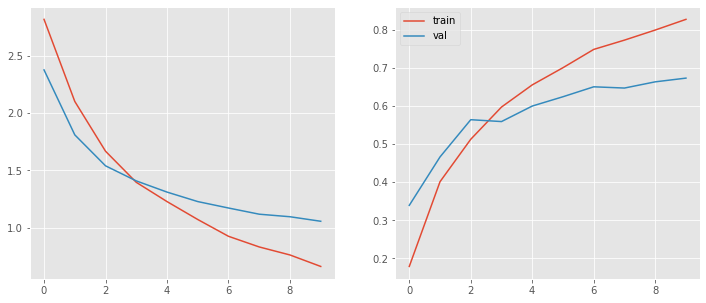

In [24]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.subplot(122)
plt.plot(history.history["sparse_categorical_accuracy"], label="train")
plt.plot(history.history["val_sparse_categorical_accuracy"], label="val")
plt.legend()
plt.show()

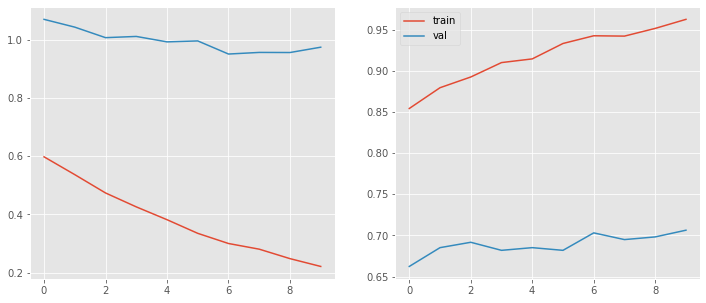

In [25]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(history1.history["loss"], label="train")
plt.plot(history1.history["val_loss"], label="val")
plt.subplot(122)
plt.plot(history1.history["sparse_categorical_accuracy"], label="train")
plt.plot(history1.history["val_sparse_categorical_accuracy"], label="val")
plt.legend()
plt.show()

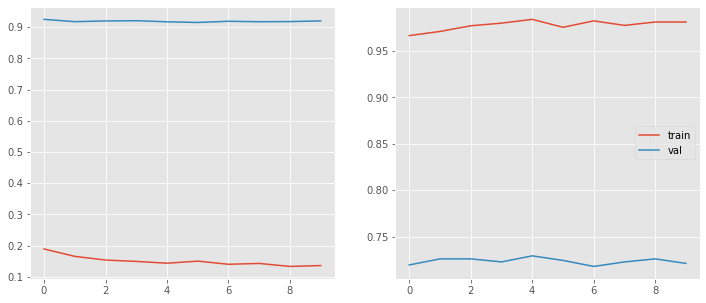

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(history2.history["loss"], label="train")
plt.plot(history2.history["val_loss"], label="val")
plt.subplot(122)
plt.plot(history2.history["sparse_categorical_accuracy"], label="train")
plt.plot(history2.history["val_sparse_categorical_accuracy"], label="val")
plt.legend()
plt.show()

In [27]:
true_labels = []
predicted_labels = []

for batch, labels in val_ds:
  true_labels.append(labels.numpy())
  predicted_labels.append(tf.argmax(model(batch), axis=1).numpy())

In [28]:
true_labels = np.hstack(true_labels)
predicted_labels = np.hstack(predicted_labels)

In [29]:
conf_mat = confusion_matrix(true_labels, predicted_labels)

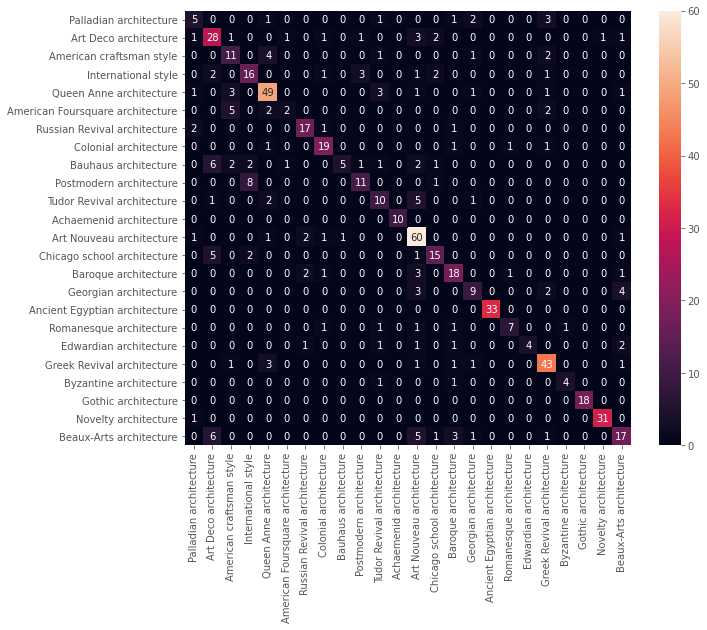

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, xticklabels=id2class, yticklabels=id2class, annot=True)

# Submit

In [31]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory="test",
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False
)

Found 1512 files belonging to 1 classes.


In [32]:
file_ids = [os.path.splitext(filename)[0] for filename in sorted(os.listdir('test/test'))]

predictions = np.hstack([
  tf.argmax(model(batch), axis=1).numpy()
  for batch, _ in test_ds
])

In [33]:
submit = pd.DataFrame({"Id": file_ids, "Category": predictions})

In [34]:
submit.to_csv("advanced_sub.csv", index=False)